In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

data = pd.read_csv('oil_palm_production.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)

# Check for missing values
print(data.isnull().sum())

## Fill missing 'Rainfall' and 'Rainday' with the mean of the same month across years
data['Rainfall'] = data['Rainfall'].fillna(data.groupby(data['Date'].dt.month)['Rainfall'].transform('mean'))
data['Rainday'] = data['Rainday'].fillna(data.groupby(data['Date'].dt.month)['Rainday'].transform('mean'))

# Create lag features for Fertilizer, Rainfall, and Rainday up to 24 months
for i in range(1, 25):
    data[f'Fertilizer_lag_{i}'] = data['Fertilizer'].shift(i)
    data[f'Rainfall_lag_{i}'] = data['Rainfall'].shift(i)
    data[f'Rainday_lag_{i}'] = data['Rainday'].shift(i)

# Extract month
data['Month'] = data['Date'].dt.month

# Define a function to categorize age
def age_group(age):
    if age <= 3:
        return 'No Production'
    elif 4 <= age <= 8:
        return 'Low Increasing'
    elif 9 <= age <= 15:
        return 'Optimal'
    elif 16 <= age <= 20:
        return 'Plateauing'
    else:
        return 'Declining'

# Apply the function to create 'Age_Group'
data['Age_Group'] = data['Age'].apply(age_group)

# Convert 'Age_Group' into dummy variables
data = pd.get_dummies(data, columns=['Age_Group'], drop_first=True)

# Drop rows with NaN values resulting from lag features
data = data.dropna().reset_index(drop=True)

data.head(5)


Production    0
Age           0
Area          0
Palm Stand    0
Fertilizer    0
Rainfall      2
Rainday       3
dtype: int64


KeyError: 'Date'

C:\Users\Asyraf Workstation\AppData\Local\Temp\ipykernel_9004\3830280814.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_production = data['Production'].resample('M').mean()


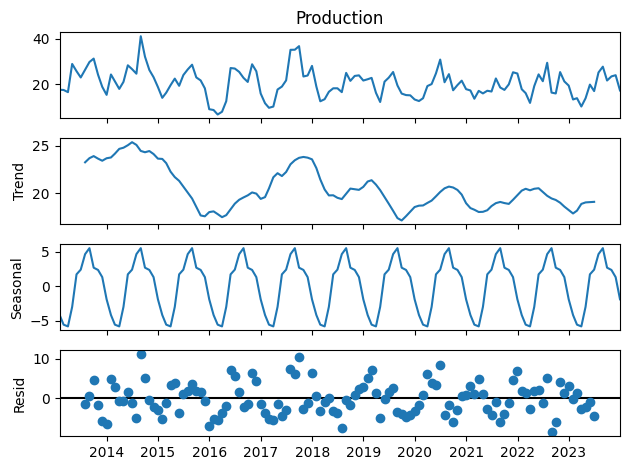

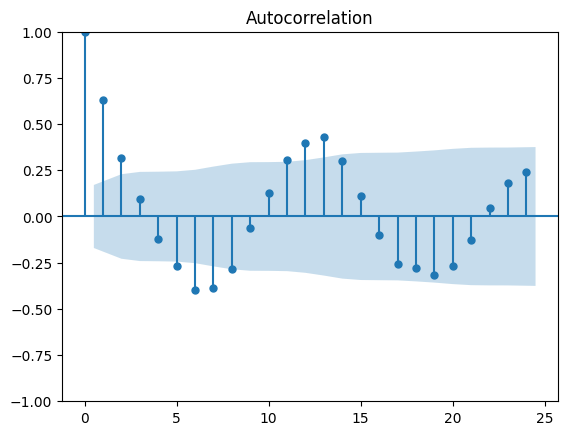

In [ ]:



# Resample data monthly (if not already)
monthly_production = data['Production'].resample('M').mean()

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(monthly_production, model='additive', period=12)

# Plot the decomposition
decomposition.plot()
plt.show()

# Plot ACF
plot_acf(monthly_production.dropna(), lags=24)
plt.show()


In [ ]:
import scipy.stats as stats
import seaborn as sns

# Ensure 'Age_Group' is correctly categorized
data['Age_Group'] = data['Age'].apply(age_group)

# Visualize production by age group
sns.boxplot(x='Age_Group', y='Production', data=data)
plt.title('Production by Age Group')
plt.show()

# Extract production values for each age group
groups = [group['Production'].values for name, group in data.groupby('Age_Group')]

# Perform ANOVA
F_statistic, p_value = stats.f_oneway(*groups)

print(f'ANOVA F-statistic: {F_statistic:.2f}, p-value: {p_value:.4f}')


NameError: name 'age_group' is not defined